In [1]:
import pandas as pd
import json
import os
import glob
import sys
import os
import random
random.seed(42)

First we have to read in all the json files and make them into one comprehensive dataframe

In [2]:
# Initialize an empty list to store the JSON objects
json_objects = []

# Find all subdirectories under the Data directory
# subdirectories = next(os.walk('Data'))[1]
subdirectories = next(os.walk('data_collection'))[1]

# Loop over all subdirectories
for subdirectory in subdirectories:
    # Construct the full path to the subdirectory
    # subdirectory_path = os.path.join('Data', subdirectory)
    subdirectory_path = os.path.join('data_collection', subdirectory)
    
    # Find all JSONL files under the current subdirectory
    jsonl_files = glob.glob(os.path.join(subdirectory_path, '*.txt')) + \
                  glob.glob(os.path.join(subdirectory_path, 'part*'))

    # Loop over all JSONL files
    for file in jsonl_files:
        # Open the file and read its contents line by line
        with open(file, 'r', encoding='utf-8') as f:
            for line in f:
                # Parse the JSON object from the line
                json_obj = json.loads(line)
                # Append the JSON object to the list
                json_objects.append(json_obj)

# Convert the list of JSON objects into a DataFrame
df = pd.DataFrame(json_objects)

df

,aid,title,url,domain,votes,user,posted_at,comments,source_title,source_text,frontpage
0,39985927,Metabolism in adulthood does not slow as commo...,https://www.nbcnews.com/health/health-news/met...,nbcnews.com,4,paulpauper,2024-04-10 01:01:20,0,What we thought about metabolism may be all wr...,Metabolism in adulthood does not slow as commo...,True
1,39985930,"England Limits Youth Gender Medications, Part ...",https://www.nytimes.com/2024/04/09/health/euro...,nytimes.com,1,cempaka,2024-04-10 01:02:06,0,"England Limits Youth Gender Medications, Part ...","England Limits Youth Gender Medications, Part ...",False
2,39985934,Cookie consent choices are just being ignored ...,https://www.malwarebytes.com/blog/news/2024/04...,malwarebytes.com,1,coloneltcb,2024-04-10 01:02:47,0,Cookie consent choices are just being ignored ...,Cookie consent choices are just being ignored ...,False
3,39985940,Malicious xz backdoor reveals fragility of ope...,https://www.theregister.com/2024/04/01/xz_back...,theregister.com,1,karlzt,2024-04-10 01:03:18,0,Malicious xz backdoor reveals fragility of ope...,Malicious xz backdoor reveals fragility of ope...,False
4,39985949,Lmsys Chatbot Arena: Benchmarking LLMs in the ...,https://arena.lmsys.org/,lmsys.org,1,EvgeniyZh,2024-04-10 01:04:55,0,Just a moment...,Just a moment...\n\n# arena.lmsys.org\n\n## Ve...,False
...,...,...,...,...,...,...,...,...,...,...,...
2605,40129465,Excel World Championships,https://www.youtube.com/watch?v=AryjgCGjAB8,youtube.com,1,razodactyl,2024-04-23 07:28:53,0,Live-stream announcers losing their minds on M...,Live-stream announcers losing their minds on M...,False
2606,40129470,ELI5: What Are Prions?,https://old.reddit.com/comments/g13qo1/comment...,reddit.com,5,thunderbong,2024-04-23 07:29:56,0,Blocked,"Blocked\n\n# whoa there, pardner!\n\nYour requ...",True
2607,40129475,Impenetrable Language,https://veselin.blog/2024/01/30/impenetrable-l...,veselin.blog,2,luu,2024-04-23 07:30:34,0,Impenetrable Language,Impenetrable Language – Veselin.blog\n\nSkip t...,False
2608,40129500,WIP Is Waste,https://thoughtbot.com/blog/wip-is-waste,thoughtbot.com,2,ingve,2024-04-23 07:36:07,0,WIP is waste,WIP is waste\n\nSkip to main content\n\nLive o...,False


In [3]:
df['source_text'] = df['source_text'].fillna('')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   aid           2610 non-null   object
 1   title         2610 non-null   object
 2   url           2610 non-null   object
 3   domain        2610 non-null   object
 4   votes         2610 non-null   int64 
 5   user          2610 non-null   object
 6   posted_at     2610 non-null   object
 7   comments      2610 non-null   int64 
 8   source_title  2557 non-null   object
 9   source_text   2610 non-null   object
 10  frontpage     2610 non-null   bool  
dtypes: bool(1), int64(2), object(8)
memory usage: 206.6+ KB


In [4]:
# show the data with null source_title
null_source_title_df = df[df['source_title'].isnull()]
null_source_title_df

,aid,title,url,domain,votes,user,posted_at,comments,source_title,source_text,frontpage
35,39986331,"Musk loses, may have to pay fees: X Corp. vs. ...",https://storage.courtlistener.com/recap/gov.us...,courtlistener.com,6,1vuio0pswjnm7,2024-04-10 02:17:34,2,None,\n\n,True
52,39986331,"Musk loses, may have to pay fees: X Corp. vs. ...",https://storage.courtlistener.com/recap/gov.us...,courtlistener.com,6,1vuio0pswjnm7,2024-04-10 02:17:34,2,None,\n\n,True
104,39986865,CurveDNS: A DNSCurve forwarder in the academic...,https://web.archive.org/web/20110814043405if_/...,archive.org,1,1vuio0pswjnm7,2024-04-10 04:08:17,0,None,\n\n,False
136,39987244,OpenAI and Meta ready new AI models capable of...,https://www.ft.com/content/78834fd4-c4d1-4bab-...,ft.com,1,hcrisp,2024-04-10 05:26:39,0,None,OpenAI and Meta ready new AI models capable of...,False
178,39987964,Ultima IV: Quest of the Avatar – Pre-Game Ques...,https://gamefaqs.gamespot.com/pc/562660-ultima...,gamespot.com,1,peter_d_sherman,2024-04-10 07:33:25,0,None,# Request Blocked\n\nDue to abuse from this ho...,False
196,39988218,How to create a tag input with Tailwind CSS an...,https://lexingtonthemes.com/tutorials/how-to-c...,lexingtonthemes.com,1,Mike_Andreuzza,2024-04-10 08:12:00,0,None,"Lexington has been awarded a grant from Astro,...",False
207,39988393,Show HN: Www.naildesigns.cloud – design nail a...,https://www.naildesigns.cloud/,naildesigns.cloud,1,kuzej,2024-04-10 08:42:53,0,None,\n\n,False
267,39989179,RecurrentGemma: Moving Past Transformers for E...,https://storage.googleapis.com/deepmind-media/...,storage.googleapis.com,1,alekandreev,2024-04-10 10:42:01,0,None,,False
321,39989769,German industry unlikely to recover from energ...,https://www.ft.com/content/5d98bcab-c8bc-49c8-...,ft.com,2,lando2319,2024-04-10 12:06:21,0,None,German industry unlikely to fully recover from...,False
466,39991337,OpenAI and Meta ready new AI models capable of...,https://www.ft.com/content/78834fd4-c4d1-4bab-...,ft.com,3,belter,2024-04-10 14:51:28,0,None,,False


We plot the number of articles which are put on the frontpage and which ones are not. Interestingly there are more articles on the frontpage maybe because they stay longer online or because others get removed. Anyhow this is what we have collected and what we have to work with.

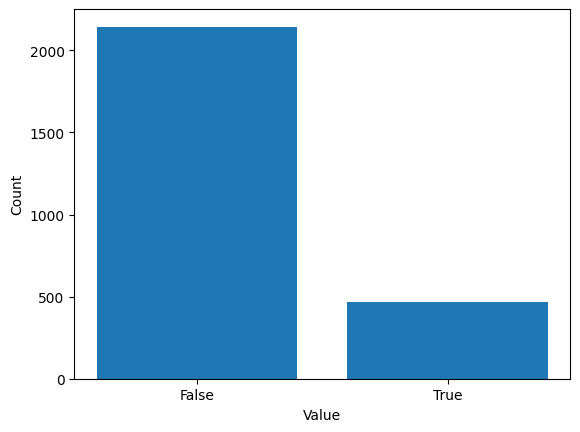

In [5]:
import matplotlib.pyplot as plt

# Get the number of True and False values in the frontpage column
num_true = df['frontpage'].sum()
num_false = len(df) - num_true

# Generate a histogram showing the distribution of True and False values
plt.bar([0, 1], [num_false, num_true])
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

We checlk the correlation between for two numerical variables with the frontpage variable and notice that they seem quite informative already.

In [6]:
import pandas as pd

# Assume df is your DataFrame
col1 = 'votes'
col2 = 'frontpage'

correlation = df[[col1, col2]].corr().iloc[0, 1]

print(correlation)

0.4974475784563371


In [7]:
import pandas as pd

# Assume df is your DataFrame
col1 = 'comments'
col2 = 'frontpage'

correlation = df[[col1, col2]].corr().iloc[0, 1]

print(correlation)

0.2926392781503826


We convert the frontpage column to integer for further analysis

In [8]:
df["frontpage"] = df["frontpage"].astype(int)

Now we will create a spart dataframe and already make our test an training set

In [9]:
# Let us try converting this Dataframe to a PySpark dataframe

In [10]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, Word2Vec
from pyspark.mllib.clustering import LDA
from pyspark.sql.functions import col
import numpy as np

In [11]:
# Initialize a SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("Topic Modeling Example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

pyspark_df = spark.createDataFrame(df)

In [12]:


train_data, test_data = pyspark_df.randomSplit([0.7, .3]) 



Next, we perform preprocessing namely pattern-based preprocessing, remove stopwords, vectorize it and then apply IDF.

In [13]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, Word2Vec
from pyspark.ml.clustering import LDA

regexTokenizer = RegexTokenizer().setInputCol("source_text").setOutputCol("words").setPattern(r'\W+')
stopWordsRemover = StopWordsRemover().setInputCol("words").setOutputCol("tokens")
countVectorizer = CountVectorizer().setInputCol("tokens").setOutputCol("rawFeatures").setVocabSize(2000)
idfTransformer = IDF().setInputCol("rawFeatures").setOutputCol("features")

Use word2vec to represent the preprocessed source title ('tokens' column) by vectors

In [14]:
word2vec = Word2Vec(vectorSize=10, minCount=0, inputCol="tokens", outputCol="w2v")

Use LDA to extract the topics from texts

In [15]:
# set the number of topics as 4
lda = LDA(k=4, optimizer="online", seed=42, featuresCol="features", topicDistributionCol="topicDistribution")

In [16]:
from pyspark.ml.feature import VectorAssembler

# Combine two original features, word vectors and LDA topic distributions into the final feature space for logistic regression
assembler = VectorAssembler(inputCols=['votes','comments', "w2v", "topicDistribution"], outputCol="finalFeatures")

In [17]:
from pyspark.ml.classification import LogisticRegression

logistic_regression = LogisticRegression(featuresCol="finalFeatures", labelCol="frontpage")

In [18]:
from pyspark.ml import Pipeline

# create a pipeline including all stages
pipeline = Pipeline(stages=[
    regexTokenizer, 
    stopWordsRemover, 
    countVectorizer, 
    idfTransformer, 
    word2vec, 
    lda, 
    assembler, 
    logistic_regression
])

# Fit the pipeline model
pipeline_model = pipeline.fit(train_data)

# save the pipeline model
pipeline_model.write().overwrite().save("LR")

In [19]:
# save the pipeline model
pipeline_model.write().overwrite().save("LR")

In [20]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

# Extract Vocabulary and Describe Topics
vocab = pipeline_model.stages[2].vocabulary
vocab_broadcast = sc.broadcast(vocab)

ldatopics = pipeline_model.stages[5].describeTopics()

def map_termID_to_Word(termIndices):
    words = []
    for termID in termIndices:
        word = vocab_broadcast.value[termID]
        if word.isalpha():
            words.append(word)

    return words


udf_map_termID_to_Word = udf(map_termID_to_Word , ArrayType(StringType()))

ldatopics_mapped = ldatopics.withColumn("topic_desc", udf_map_termID_to_Word(ldatopics.termIndices))

In [21]:
from pyspark.sql.functions import col

# show the topics
topics_list = [x['topic_desc'] for x in ldatopics_mapped.select("topic_desc").collect()]
for topic in topics_list:
    print(topic)

['retention', 'period', 'advertising', 'expiry', 'purposes', 'consent', 'personalised', 'select', 'day', 'special']
['policylaunch', 'identifiers', 'data', 'duration', 'device', 'details', 'precise', 'addresses', 'storage', 'processed']
['ash', 'fix', 'file', 'gui', 'dwarfs', 'code', 'software', 'c']
['uniforms', 'pubmed', 'ranks', 'scholar', 'pictures', 'asd', 'exhibitors', 'j', 'neurons', 'mitochondrial']


In [22]:
# Storing the results on test data 
results = pipeline_model.transform(test_data) 

# fit_model.write().overwrite().save("LR")

# Filter the results to only include rows where the predicted value is 1
results_filtered = results.filter(col('prediction') == 1)

# Show the filtered results
results_filtered.select('votes', 'comments', "w2v", "topicDistribution", "finalFeatures", 'rawPrediction', 'probability', 'prediction').show()

+-----+--------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|votes|comments|                 w2v|   topicDistribution|       finalFeatures|       rawPrediction|         probability|prediction|
+-----+--------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    4|       0|[0.29257655897164...|[0.77299935754789...|[4.0,0.0,0.292576...|[-0.8045437667645...|[0.30905440304043...|       1.0|
|    6|       0|[0.17224140336411...|[0.21749654673539...|[6.0,0.0,0.172241...|[-3.4803532360284...|[0.02987643996733...|       1.0|
|    5|       0|[0.22503657396850...|[0.67442364797668...|[5.0,0.0,0.225036...|[-2.3530496085691...|[0.08682367836968...|       1.0|
|   17|       0|[-0.0668784905225...|[0.05773966109058...|[17.0,0.0,-0.0668...|[-22.780398499069...|[1.27819947914491...|       1.0|
|   11|       2|[0.15992274649864...|[0.31833993358067...|[11.0,2.0,0

In [23]:
 #Importing the evaluator 
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
  
# Calling the evaluator 
res = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='frontpage') 
  
# Evaluating the AUC on results 
ROC_AUC = res.evaluate(results)

In [24]:
ROC_AUC

0.9216165413533836